EPITA 2020 MLRF practice_02-03_twinit-part2-matching v2020-04-30_002251 by Joseph CHAZALON

<div style="overflow: auto; padding: 10px; margin: 10px 0px">
<img alt="Creative Commons License" src='img/CC-BY-4.0.png' style='float: left; margin-right: 20px'>
    
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
</div>

# Practice 02 part 03: Match keypoints and solve *Twin it!*
In this part we will reuse pre-computed elements from the previous parts:
- the distance matrix between bubbles computed from color histograms;
- keypoints and descriptors for each bubble.

The idea is to select pairs of bubbles which are close according to the color histogram, then to compare the descriptors extracted from each of them. Based on the number of near-identical matches, we will return a much compact list of twin candidates.

This last part is decomposed into 3 steps:
1. Prepare a matching framework to compare sets of descriptors.
2. Reload all the pre-computed elements from the previous parts.
3. Solve *Twin it!*.


## 1. Prepare a matching framework
Given two list of descriptors, $D_1$ and $D_2$ (which actually are flattened color image patches), we want to identify the matching pairs.

**Instead of using a distance like the sum of squared differences, we will use a scoring approach, therefore the higher the score the better the matching.**

This will be performed in three steps:
1. Find for each element $d_i \in D_1$ the best match $\hat{d_j} \in D_2$, ie build the set 
$$
\{
(d_i,\hat{d_j}) \mid
\hat{d_j} = \underset{d_j \in D_2}{\mathrm{argmax}} \operatorname{score}(d_i, d_j)
\},
$$
with the constraint that the matching score of two elements is above a minimal threshold: $$\operatorname{score}(d_i, d_j) > T.$$
In practice we only store the indices of the matching pairs.
2. Perform the reverse operation, find for each element $d_j \in D_2$ its best match $\hat{d_i} \in D_1$.
3. Keep only the matches which "agree", ie pairs that are in both sets.

**No need to use large descriptors to test this step:** we know our descriptors are 1-dimensional NumPy arrays, so you can test very simple cases to check your method before running it on large descriptors.

In [1]:
# deactivate buggy jupyter completion
%config Completer.use_jedi = False

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
# TODO
PATH_TO_RESOURCES = "."  # FIXME set this to the path of the twinit resource directory

In [4]:
# prof
PATH_TO_RESOURCES = "/home/jchazalo/git/jchazalo/cours-mlrf-preparation/resources/twin_it"

#### Normalized cross correlation
The scoring method we will use to compare the descriptors (color image patches) had the following formula, where $d_i$ and $d_j$ are two descriptors of the same size (`3*patchside**2`):
$$
\operatorname{ncc}(d_i, d_j) = 
\frac{1}{|d_i|} 
\sum{
    \frac{d_i - \bar{d_i}}{\sigma_{d_i} + \epsilon}
    \times
    \frac{d_j - \bar{d_j}}{\sigma_{d_j} + \epsilon}
    }
$$
where:
- $|d_i| = |d_j|$ is the length of the descriptor;
- $\sum$ is the sum of the components of a vector;
- $\times$ is the component-wise product of two vectors;
- $\bar{d_i}$ is the mean value of $d_i$;
- $\sigma_{d_i}$ is the standard deviation of $d_i$;
- $\epsilon$ is a very small value ($\ll 1$) to avoid instability when $\sigma_{d_i} = 0$ (this may happens with buggy patches with constant values).

This simply compares vectors whose values are shifted around $0$ and scaled.

The result is close to $1$ for vectors which are highly colinears.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Complete the function below to compute a normalized cross correlation between descriptors.**

Tip: Check Numpy documentation for your `np.array`s to find useful operations like `array.mean()` or `np.sum()`.
</div>

In [5]:
# TODO complete this function
def ncc(v1, v2, epsilon=10e-6):
    '''Computes the normalized cross correlation between two vectors.'''
    n = len(v1)
    if n != len(v2):
        raise ValueError("v1 and v2 must have the same len."
                         "I got len(v1)=%d and len(v2)=%d" % (n, len(v2)))
    ncc_value = -1.  # FIXME
    return ncc_value

In [6]:
# prof
def ncc(v1, v2, epsilon=10e-6):
    '''Computes the normalized cross correlation between two vectors.'''
    n = len(v1)
    if n != len(v2):
        raise ValueError("v1 and v2 must have the same len."
                         "I got len(v1)=%d and len(v2)=%d" % (n, len(v2)))
    v1_ = (v1 - v1.mean()) / (v1.std() + epsilon)
    v2_ = (v2 - v2.mean()) / (v2.std() + epsilon)
    ncc_value = np.sum(v1_ * v2_) / n
    return ncc_value

In [7]:
# RUN ME
# Some tests to help you
print(ncc(np.arange(10), np.arange(10,20)))
print(ncc(np.arange(10), np.arange(20,10,-1)))

0.9999930369301252
-0.9999930369301252


<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Complete the functions below to compute matches between descriptors.**

Tips:
- Both functions returns the indices of the descriptors from `desc2` which are the best match to the descriptors from `desc1`, or `-1` if no suitable match is found.
- Test the matching without injecting your normalized cross correlation at first.
- `np.argsort(a)` gives the indices which sort `a`.
- `np.nonzero(bool_array)` gives the indices where `bool_array` is `True`.
</div>

In [8]:
# TODO complete this function
def match(desc1, desc2, threshold=0.5):
    """ For each descriptor in the first set, 
        select its best match in the second set
        using normalized cross correlation.
        --
        Returns a list of the same size as desc1
        where elements are either an indice from descr2
        or -1 otherwise.
        """
    
    if len(desc1) == 0:
        return np.array([])
    if len(desc2) == 0:
        return np.full(len(desc1), -1)
    
    bestmatches = np.full(len(desc1), -1)  # FIXME
    
    return bestmatches

In [9]:
# TODO complete this function
def match_twosided(desc1, desc2, threshold=0.5):
    """ Two-sided symmetric version of match().
        --
        Returns a list of the same size as desc1
        where elements are either an indice from descr2
        when symmetric match is verified,
        or -1 otherwise.
    """
    # Compute the matches
    # FIXME
    # matches_12 = ...
    # matches_21 = ...
    
    # remove matches that are not symmetric
    # FIXME
    
    return np.full(len(desc1), -1)  # FIXME

In [10]:
# prof
def match(desc1, desc2, threshold=0.5):
    """ For each descriptor in the first set, 
        select its best match in the second set
        using normalized cross correlation.
        --
        Returns a list of the same size as desc1
        where elements are either an indice from descr2
        or -1 otherwise.
        """
    if len(desc1) == 0:
        return np.array([])
    if len(desc2) == 0:
        return np.full(len(desc1), -1)
    
    bestmatches = []
    for i in range(len(desc1)):
        best_j = -1
        best_val = -1
        for j in range(len(desc2)):
            ncc_value = ncc(desc1[i], desc2[j])
            if ncc_value > threshold and ncc_value > best_val:
                best_j = j
                best_val = ncc_value
        bestmatches.append(best_j)
        
    return np.array(bestmatches)

def match_twosided(desc1, desc2, threshold=0.5):
    """ Two-sided symmetric version of match().
        --
        Returns a list of the same size as desc1
        where elements are either an indice from descr2
        when symmetric match is verified,
        or -1 otherwise.
    """
    
    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    
    # indices of the elements which are actual matches
    ndx_12 = np.nonzero(matches_12 >= 0)[0]
    
    # remove matches that are not symmetric
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
    
    return matches_12

In [11]:
# prof
# the version with the normalized sum of squared differences
# bad results

# def match(desc1, desc2, threshold=0.5):
#     """ For each descriptor in the first set, 
#         select its best match in the second set
#         using normalized sum of squared differences.
#         --
#         Returns a list of the same size as desc1
#         where elements are either an indice from descr2
#         or -1 otherwise.
#         """
#     if len(desc1) == 0:
#         return np.array([])
#     if len(desc2) == 0:
#         return np.full(len(desc1), -1)
    
#     bestmatches = []
#     for i in range(len(desc1)):
#         best_j = -1
#         best_val = 1
#         for j in range(len(desc2)):
#             # norm. ssd
#             dist = (np.sum((desc1[i] - desc2[j]))**2 
#                     / np.sqrt((np.sum(desc1[i])**2) * (np.sum(desc2[j])**2)))
#             if dist < threshold and dist < best_val:
#                 best_j = j
#                 best_val = dist
#         bestmatches.append(best_j)
        
#     return np.array(bestmatches)

## 2. Reload everything and match some bubbles
**We are now ready to match descriptors for some bubbles!**

We will compare some bubbles using the descriptors we previously computed.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Reload everything we need to match some bubbles, and solve the problem.**

We need:
- bubble images (color and grayscale),
- the distance matrix between bubbles computed using color histograms,
- the keypoints coordinates and descriptors we computed previously.
</div>

In [12]:
# TODO load everything we need
bubble_files = !ls $PATH_TO_RESOURCES/bubbles_200dpi/b*.png | sort
bubbles = []  # FIXME
bubbles_gray = []  # FIXME
dist_mat = np.array([])  # FIXME
# TIP: use some values we computed for the distance matrix:
# npdata = np.load(PATH_TO_RESOURCES + "/bubble_dist_mat_rgb7-cosine.npz")
# dist_mat = npdata["dist_mat"]

keypoints = []  # FIXME
descriptors = []  # FIXME
# TIP: use some values we computed for keypoints and descriptors
# npdata = np.load(PATH_TO_RESOURCES + "/kpts_descr_harris_25pxcolor_mdist10.npz")
# keypoints = npdata["keypoints"]
# descriptors = npdata["descriptors"]

len(bubbles), len(bubbles_gray), dist_mat.shape, len(keypoints), len(descriptors)

(0, 0, (0,), 0, 0)

In [13]:
# prof
bubble_files = !ls $PATH_TO_RESOURCES/bubbles_200dpi/b*.png | sort
print(bubble_files[:3])
bubbles = [cv2.imread(ff) for ff in bubble_files]
bubbles_gray = [cv2.cvtColor(bb, cv2.COLOR_BGR2GRAY) for bb in bubbles]
npdata = np.load(PATH_TO_RESOURCES + "/bubble_dist_mat_rgb7-cosine.npz")
dist_mat = npdata["dist_mat"]
npdata = np.load(PATH_TO_RESOURCES + "/kpts_descr_harris_25pxcolor_mdist10.npz")
keypoints = npdata["keypoints"]
descriptors = npdata["descriptors"]
del npdata
len(bubbles), len(bubbles_gray), dist_mat.shape, len(keypoints), len(descriptors)

['/home/jchazalo/git/jchazalo/cours-mlrf-preparation/resources/twin_it/bubbles_200dpi/b001.png', '/home/jchazalo/git/jchazalo/cours-mlrf-preparation/resources/twin_it/bubbles_200dpi/b002.png', '/home/jchazalo/git/jchazalo/cours-mlrf-preparation/resources/twin_it/bubbles_200dpi/b003.png']


(391, 391, (391, 391), 391, 391)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Using the display function provided below, compute and display some matches between a couple of bubbles.**

Tips:
- Bubbles with indices `35` and `219` are good candidates. So are bubbles `49` and `278`.
- Try to find a good value for the threshold.
</div>

In [14]:
# Display functions
def appendimages(im1, im2):
    """ Return a new image that appends the two images side-by-side. """
    # select the image with the fewest rows and fill in enough empty rows
    rows1 = im1.shape[0]    
    rows2 = im2.shape[0]
    if rows1 < rows2:
        im1 = np.concatenate((im1, np.zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = np.concatenate((im2, np.zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # if none of these cases they are equal, no filling needed.
    return np.concatenate((im1,im2), axis=1)

def plot_matches(im_gray1, im_gray2, locs1, locs2, matches, show_below=True):
    """ Show a figure with lines joining the accepted matches 
        input: im_gray1,im_gray2 (images as arrays),
        locs1,locs2 (feature locations, aka keypoints), 
        matches (as output from 'match()'), 
        show_below (if images should be shown below matches). """
    if im_gray1.ndim != 2 or im_gray2.ndim != 2:
        raise ValueError("plot_matches takes gray images (ndim == 2) as arguments."
                         " I got im_gray1.ndim = %d and im_gray2.ndim = %d" 
                         % (im_gray1.ndim, im_gray2.ndim))
    im3 = appendimages(im_gray1, im_gray2)
    if show_below:
        im3 = np.vstack((im3,im3))
    plt.figure()
    plt.imshow(im3, cmap='gray')
    cols1 = im_gray1.shape[1]
    for i,m in enumerate(matches):
        if m >= 0:
            plt.plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],'r')
    plt.axis('off')
    plt.show()

In [15]:
# TODO display some matches, both single way and symmetric


35 → 219
9 matches / 37 descr.


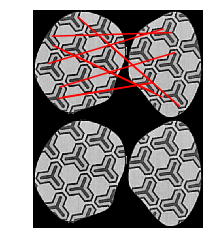

219 → 35
9 matches / 38 descr.


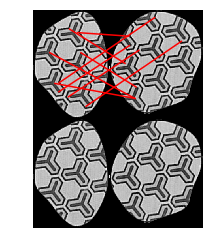

35 ⇔ 219
8 matches / 37 descr.


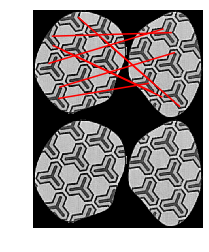

35 → 36
0 matches / 37 descr.


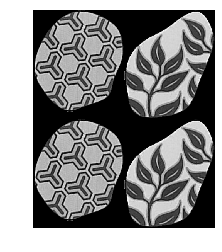

36 → 35
0 matches / 24 descr.


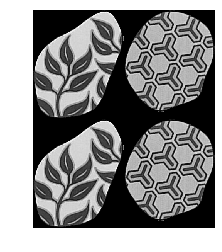

35 ⇔ 36
0 matches / 37 descr.


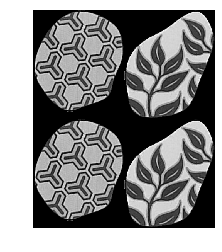

49 → 278
1 matches / 42 descr.


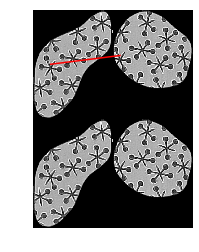

278 → 49
1 matches / 44 descr.


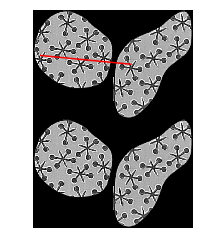

49 ⇔ 278
1 matches / 42 descr.


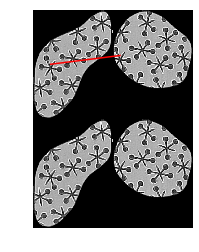

In [16]:
# prof
thres = 0.9
def compute_plot_matches(bid1, bid2, sym=False):
    match_fun = match_twosided if sym else match
    print("%d %s %d" % (bid1, "⇔" if sym else "→", bid2))
    matches = match_fun(descriptors[bid1], descriptors[bid2], threshold=thres)
    print('%d matches / %d descr.' % (np.count_nonzero(matches >= 0), len(matches)))
    plot_matches(bubbles_gray[bid1], bubbles_gray[bid2],
                 keypoints[bid1], keypoints[bid2],
                 matches)

compute_plot_matches(35, 219)
compute_plot_matches(219, 35)
compute_plot_matches(35, 219, True)
compute_plot_matches(35, 36)
compute_plot_matches(36, 35)
compute_plot_matches(35, 36, True)
compute_plot_matches(49, 278)
compute_plot_matches(278, 49)
compute_plot_matches(49, 278, True)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Write down some observations about the previous matchings. What are the limitations of our approach?**
</div>

What are the limitations of the matching we implemented?

**TODO**

(PROF)
There are at least 2 limitations:
1. We need a threshold (this is hard to get ride of).
2. The symmetric match filters too many keypoints: because of the repetitive texture, the second, third, etc. best matches may be acceptable too but only the best one is kept. If would be better to:
  - look for a maximal coupling,
  - check for geometrical consistency.

## 3. Solve *Twin it!*
At last we can try to filter bubbles more efficiently.

We will first pre-select the bubbles using the distance matrix computed using color histograms, then we will further filter this pre-selection using desriptor matching.
Then, we will be able to count the number of matches to select best candidates.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Try to display only bubbles with twins. (Try to minimize the amount of human control.)**

Tips:
- For each bubble, display best candidates (if any).
- Keep only a few (5 or so) candidates using the distance matrix computed on color histograms.
- Use a restrictive threshold for descriptor matching (correlation > $0.9$).
- Use the count of matches to make a decision.
- Here are a few bubble ids to check if you do not have the time to run all the computation: `[0, 1, 35, 36, 43, 44, 49, 50, 91, 92, 105, 106]`.
</div>

In [17]:
# TODO solve twin it!

16 (28 kpts) - 115:1/28 


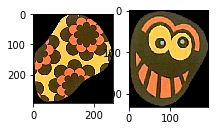

17 (45 kpts) - 83:1/45 


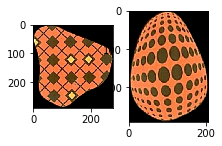

35 (37 kpts) - 219:8/37 


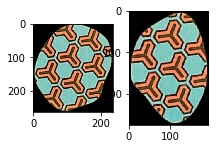

43 (16 kpts) - 347:6/12 


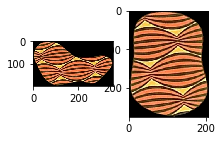

45 (24 kpts) - 230:1/24 


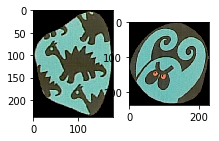

49 (42 kpts) - 278:1/42 


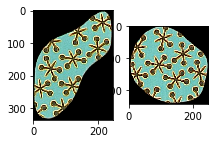

51 (12 kpts) - 60:2/12 


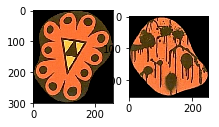

58 (12 kpts) - 117:1/12 215:1/12 


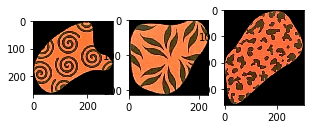

60 (35 kpts) - 51:2/35 


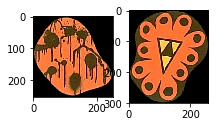

69 (55 kpts) - 332:2/46 


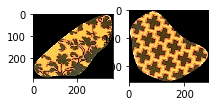

79 (36 kpts) - 324:3/36 300:2/36 169:1/36 


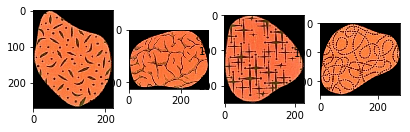

83 (44 kpts) - 87:2/43 17:1/43 167:1/43 


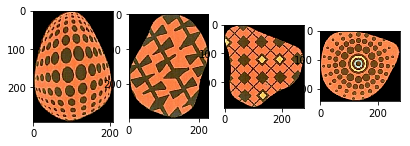

87 (36 kpts) - 83:2/36 167:1/36 


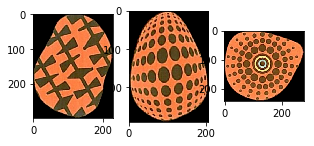

91 (15 kpts) - 230:1/15 


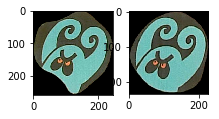

105 (15 kpts) - 229:3/15 


115 (23 kpts) - 16:1/23 


117 (17 kpts) - 60:2/17 215:1/17 58:1/17 


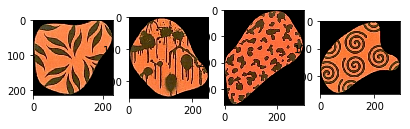

152 (23 kpts) - 83:1/23 60:1/23 


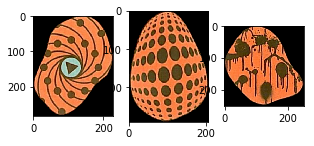

163 (11 kpts) - 124:1/11 


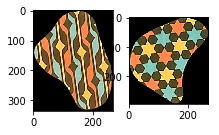

167 (43 kpts) - 87:1/40 83:1/40 


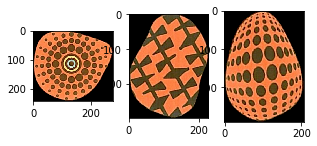

169 (41 kpts) - 324:1/41 79:1/41 


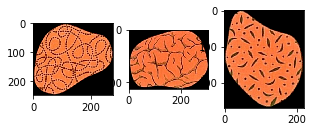

171 (41 kpts) - 382:2/41 


172 (36 kpts) - 339:4/36 


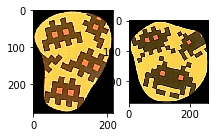

187 (10 kpts) - 212:1/10 190:1/10 


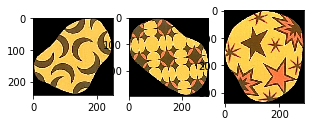

190 (47 kpts) - 187:1/47 


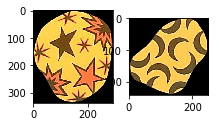

198 (9 kpts) - 322:1/9 


212 (33 kpts) - 187:1/32 


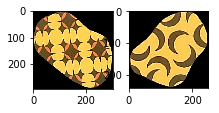

215 (61 kpts) - 117:1/61 58:1/61 


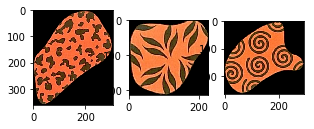

219 (38 kpts) - 35:8/38 


/home/jchazalo/.virtualenvs/mlrf_twinit_py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


229 (11 kpts) - 105:3/11 


230 (16 kpts) - 45:1/16 344:1/16 91:1/16 


278 (44 kpts) - 49:1/44 


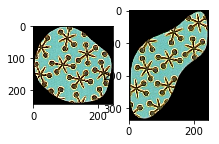

279 (21 kpts) - 300:1/21 290:1/21 


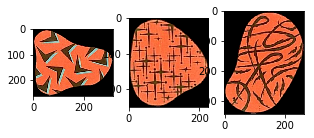

280 (24 kpts) - 215:1/24 


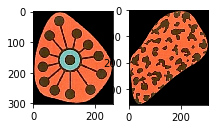

300 (35 kpts) - 324:1/34 


312 (12 kpts) - 51:1/12 


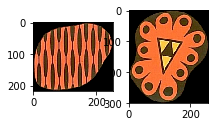

314 (28 kpts) - 87:1/28 


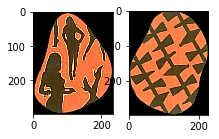

324 (29 kpts) - 79:3/26 169:1/26 300:1/26 338:1/26 


332 (39 kpts) - 69:2/38 


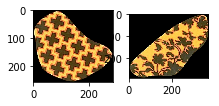

339 (42 kpts) - 172:4/42 


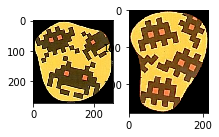

344 (34 kpts) - 230:1/34 


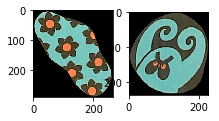

355 (48 kpts) - 279:3/47 


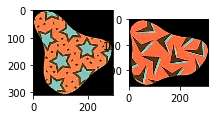

382 (43 kpts) - 117:1/43 60:1/43 


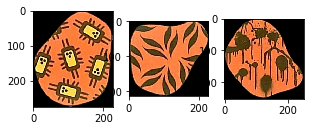

In [18]:
# prof
def imshow_raw(imlist, columns=5):
    plt.figure(figsize=(10,10))
    for ii, image in enumerate(imlist):
        plt.subplot((len(imlist) + columns - 1) // columns, columns, ii+1)
        plt.imshow(image)
    plt.show()

def imshow_bgr(imlist, columns=5):
    return imshow_raw([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in imlist], columns)

max_res = 5
thres = 0.9
# sort the distance matrix to get best candidates
best_matches_idx_perrow = np.argsort(dist_mat, axis=1)
# iterate over bubbles
# for ii in [0, 1, 35, 36, 43, 44, 49, 50, 91, 92, 105, 106]: 
for ii in range(len(bubbles)):
    str_to_print = "%d (%d kpts) - "%(ii, len(keypoints[ii]))
    bb_to_display = [bubbles[ii]]
    
    candidates_id = best_matches_idx_perrow[ii, 0:max_res]
    
    # Symmetric version
    matches = [match_twosided(descriptors[ii], descriptors[jj], threshold=thres) 
               for jj in candidates_id]
    mcounts = np.array([np.count_nonzero(np.array(m) != -1) for m in matches])
    mtotal = np.array([len(m) for m in matches])
    score = np.nan_to_num(mcounts / mtotal)
    
    # Display the best matches in descending order
    order = np.argsort(-score)
#     order = np.argsort(-mcounts)
    for jj in range(max_res):
        bb_idx = candidates_id[order[jj]]
        mc = mcounts[order[jj]]
        mt = mtotal[order[jj]]
        if mc > 0:
            bb_to_display.append(bubbles[bb_idx])
            str_to_print += "%i:%d/%d " % (bb_idx, mc, mt)
       
    if len(bb_to_display) > 1:
        print(str_to_print)
        imshow_bgr(bb_to_display, columns=max_res+1)

# Job done!
You completed the session 2.

You should write down some observations below, like what are the parameters we tuned and how.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Write some observations below.**

Tips:
- What are the parameters we tuned?
- Are there other parameters in our method?
</div>

TODO write some observations.

We can play with
- the size of the descriptors
- their spacing
- the matching strategy
- the matching threshold
- the number of candidates we keep based on color histogram comparison

and probably many other things.

Note that it is hard to recover all the twins without recovering some noise, in a general case. We have an approximate precision of 30% in the result above, but a recall of 100%.

Using the color histogram to pre-filter results really speeds things up!